In [33]:
# import the necessary libraries import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product


In [34]:
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

In [35]:
kernel = tf.constant([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1],])

In [36]:
image = tf.io.read_file('/content/images.jpeg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])


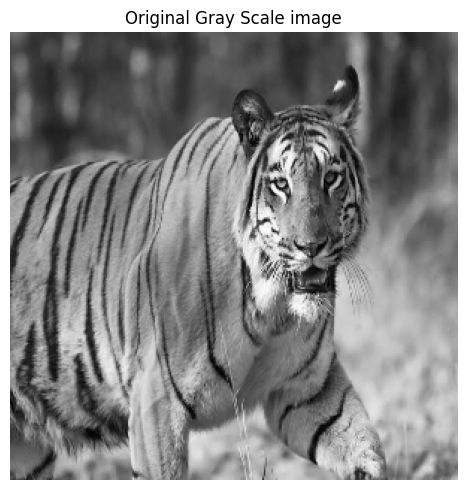

In [37]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


In [38]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


Text(0.5, 1.0, 'Convolution')

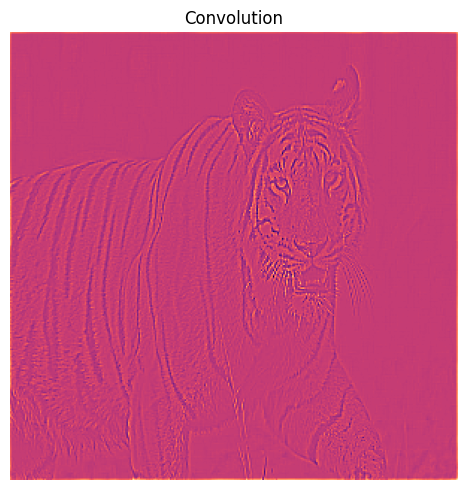

In [39]:
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image, filters=kernel, strides=1,  padding='SAME',)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

Text(0.5, 1.0, 'Activation')

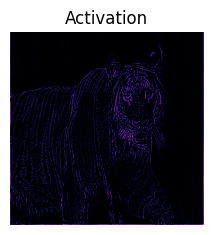

In [40]:
relu_fn = tf.nn.relu # Image detection
image_detect = relu_fn(image_filter)
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

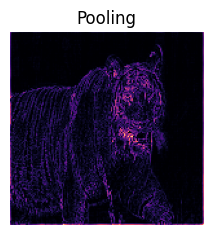

In [41]:
pool = tf.nn.pool
image_condense = pool(input=image_detect,window_shape=(2, 2), pooling_type='MAX', strides=(2, 2), padding='SAME',)
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()